# Demonstration of Post-Processing MTF50 Heatmaps using Seaborn Package
This notebook gives a short sample demonstration of how to create a combined heatmap which consists of both MTF50 values from NS-SFR runs and the number of points per heatmap grid as obtained from MATLAB post-processing files. The resulting heatmaps can be found in the research paper accompanying this project. Each heatmap shown below in the final output is saved ni its respective results directory. This system ensures an organized system of final results generation for future experiments which may be useful. 

In [ ]:
import os
rootdir = 'your path to a directory with a sub-directory of results'

In [ ]:
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        print(os.path.join(subdir, file))

In [226]:
hppg_fn = 'horizontal_points_per_grid'
vppg_fn = 'vertical_points_per_grid'
meanHmtf50_fn = 'surface_plot_horizontal_MTF50_mean'
meanVmtf50_fn = 'surface_plot_vertical_MTF50_mean'

In [227]:
import pandas as pd
hppg=pd.read_csv("".join([hppg_fn,'.csv']), header=None)
vppg=pd.read_csv("".join([vppg_fn,'.csv']), header=None)
meanHmtf50=pd.read_csv("".join([meanHmtf50_fn,'.csv']), header=None)
meanVmtf50=pd.read_csv("".join([meanVmtf50_fn,'.csv']), header=None)

In [228]:
hppg.head(1)

,0,1,2,3,4,5,6,7
0,17,71,38,35,30,42,120,45


In [229]:
import numpy as np

import seaborn as sb

import matplotlib.pyplot as plt
import pickle

In [230]:
hppg

,0,1,2,3,4,5,6,7
0,17,71,38,35,30,42,120,45
1,98,77,56,39,59,82,127,210
2,253,344,222,50,61,334,563,304
3,9,24,26,7,20,30,36,20
4,0,0,0,0,0,0,0,0


In [231]:
meanHmtf50.values

array([[0.21309094, 0.26324127, 0.19498682, 0.2037176 , 0.1802775 ,
        0.24451383, 0.26533506, 0.25944738],
       [0.31034229, 0.25434412, 0.22517289, 0.20869482, 0.23698819,
        0.28887896, 0.30492594, 0.28416856],
       [0.2721072 , 0.25843813, 0.28331364, 0.22886716, 0.26101787,
        0.27869222, 0.27882394, 0.29791256],
       [0.23644078, 0.31112529, 0.21629219, 0.19073143, 0.23129525,
        0.27517283, 0.27750764, 0.23889735],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [232]:
text = meanHmtf50.values
data = hppg.values;
labels = (np.asarray(["{0:.3f}\n{1}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(5,8)

In [233]:
labels

array([['0.213\n17', '0.263\n71', '0.195\n38', '0.204\n35', '0.180\n30',
        '0.245\n42', '0.265\n120', '0.259\n45'],
       ['0.310\n98', '0.254\n77', '0.225\n56', '0.209\n39', '0.237\n59',
        '0.289\n82', '0.305\n127', '0.284\n210'],
       ['0.272\n253', '0.258\n344', '0.283\n222', '0.229\n50',
        '0.261\n61', '0.279\n334', '0.279\n563', '0.298\n304'],
       ['0.236\n9', '0.311\n24', '0.216\n26', '0.191\n7', '0.231\n20',
        '0.275\n30', '0.278\n36', '0.239\n20'],
       ['0.000\n0', '0.000\n0', '0.000\n0', '0.000\n0', '0.000\n0',
        '0.000\n0', '0.000\n0', '0.000\n0']], dtype='<U9')

In [234]:
meanHmtf50

,0,1,2,3,4,5,6,7
0,0.213091,0.263241,0.194987,0.203718,0.180278,0.244514,0.265335,0.259447
1,0.310342,0.254344,0.225173,0.208695,0.236988,0.288879,0.304926,0.284169
2,0.272107,0.258438,0.283314,0.228867,0.261018,0.278692,0.278824,0.297913
3,0.236441,0.311125,0.216292,0.190731,0.231295,0.275173,0.277508,0.238897
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [235]:
hppg.values

array([[ 17,  71,  38,  35,  30,  42, 120,  45],
       [ 98,  77,  56,  39,  59,  82, 127, 210],
       [253, 344, 222,  50,  61, 334, 563, 304],
       [  9,  24,  26,   7,  20,  30,  36,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [236]:
hppg.values.max()

563

# Sample code test

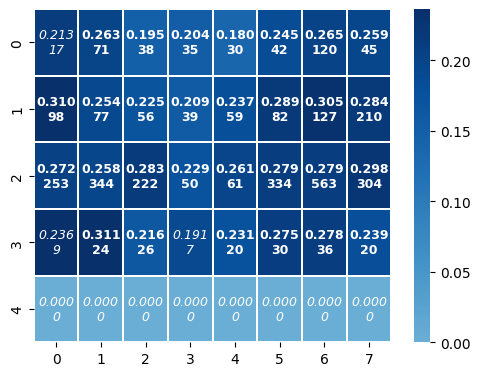

In [237]:
from matplotlib.patches import Rectangle
df1 = hppg
df2 = meanHmtf50
fig,ax = plt.subplots(figsize=(5.77, 4.328), dpi=100, facecolor='w', edgecolor='k')
for aboBel in ['above', 'below']:
  sb.heatmap(
      df2[df1 >= 20] if aboBel == 'above' else df2[df1 < 20],
      annot=labels, fmt='',
      cmap='Blues', center=0,
      annot_kws={"fontweight": 'bold' if aboBel == 'above' else 'normal', "fontsize": 9,
                 "fontstyle": 'normal' if aboBel == 'above' else 'italic'},
      cbar=(aboBel != 'above'),
      linewidths=0.02,
      ax=ax)

plt.show()

In [238]:
def heatmap_MTF50(df1, df2, filename):
  ''' heatmap_MTF50: Function which combines two dataframes together into one heatmap and saves a PNG and Pickle of the resulting heatmap
      Input: 
        df1:        2D dataframe of points per grid
        df2:        2D dataframe of MTF50 results
        filename:   Filename of original MTF50 heatmap results
  '''
  fig,ax = plt.subplots(figsize=(5.77, 4.328), dpi=100, facecolor='w', edgecolor='k')
  data = df1.values
  text = df2.values
  labels = (np.asarray(["{0:.3f}\n{1}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(5,8)
  for aboBel in ['above', 'below']:
    sb.heatmap(
        df2[df1 >= 20] if aboBel == 'above' else df2[df1 < 20],
        annot=labels, fmt='',
        cmap='Blues', center=0,
        annot_kws={"fontweight": 'bold' if aboBel == 'above' else 'normal', "fontsize": 9,
                  "fontstyle": 'normal' if aboBel == 'above' else 'italic'},
        cbar=(aboBel != 'above'),
        linewidths=0.02,
        ax=ax)
  plt.savefig("".join([filename, '.png']))
  pickle.dump(fig,open("".join([filename, '.pickle']),'wb'))

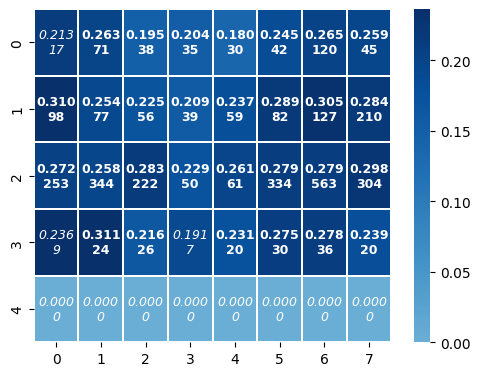

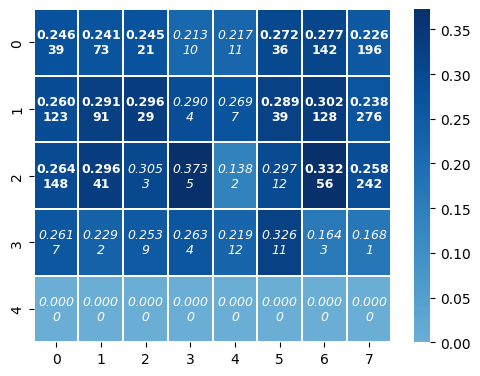

In [239]:
heatmap_MTF50(hppg, meanHmtf50, filename=meanHmtf50_fn)
heatmap_MTF50(vppg, meanVmtf50, filename=meanVmtf50_fn)

# Sample Recursive Iteration on all Sub-Directory NS-SFR Results
The following code demonstrates a sample recursive iteration through all sub-directories containing results. You must specify the root directory from which all results can be found. Each heatmap result contains the mean MTF50 value of that grid area and the number of data points which can be found inside the grid. 

<ipython-input-16-9b6949010eca>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=(6.49, 5.51), dpi=100, facecolor='w', edgecolor='k')


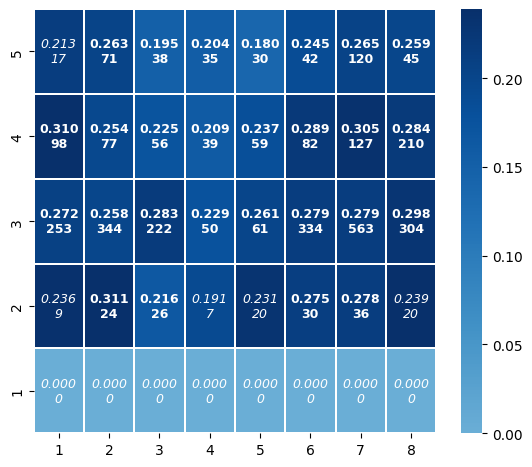

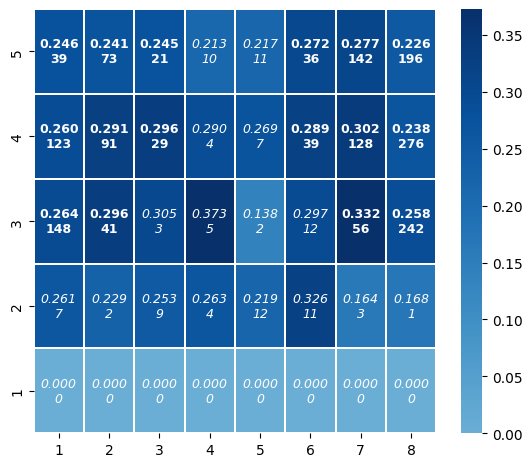

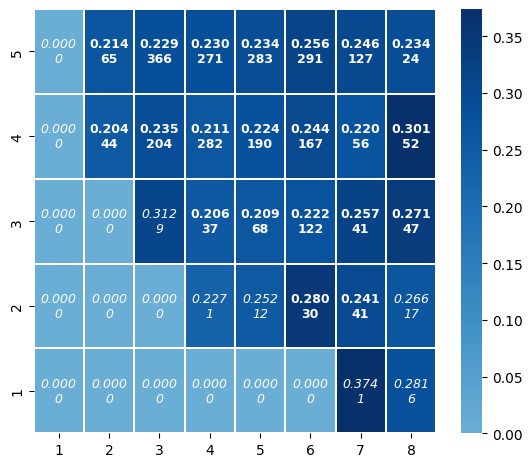

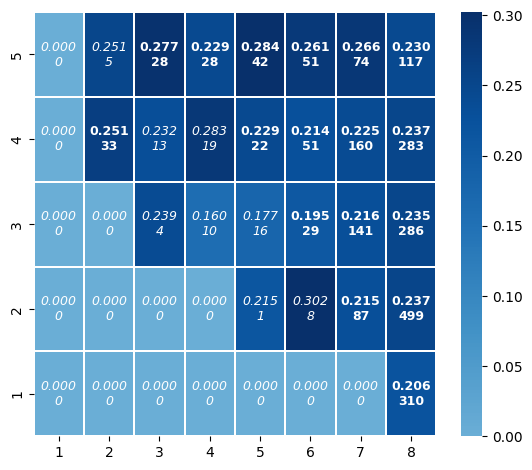

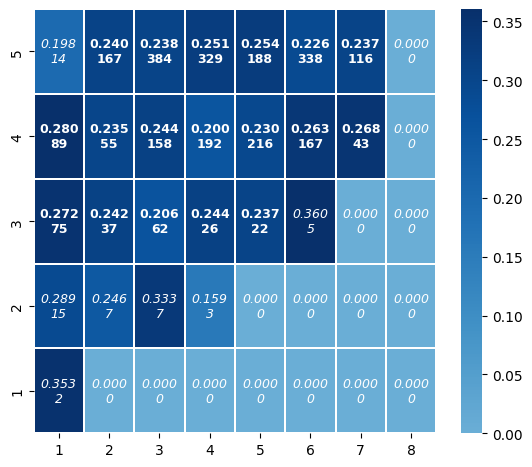

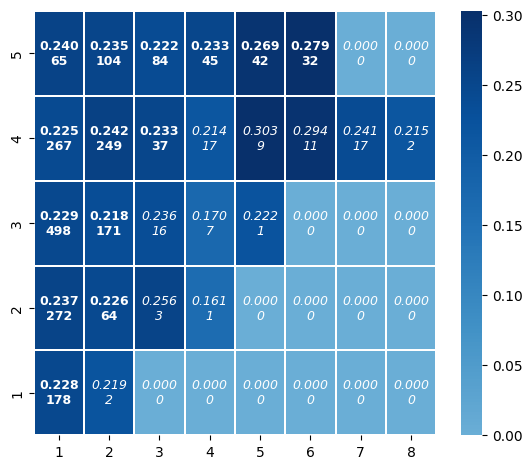

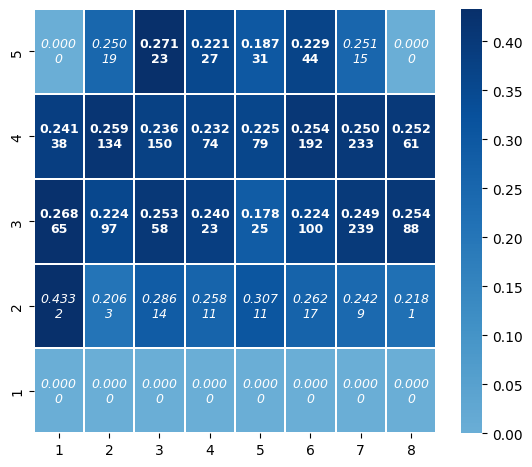

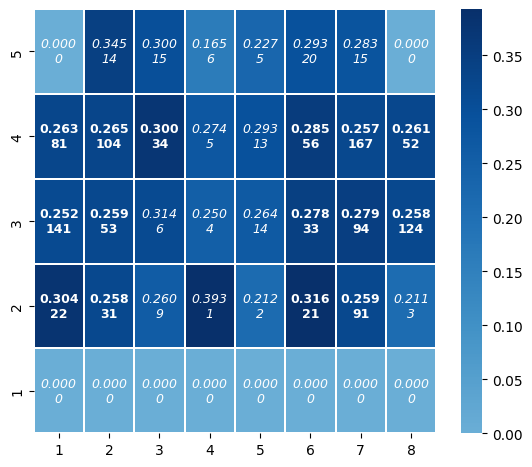

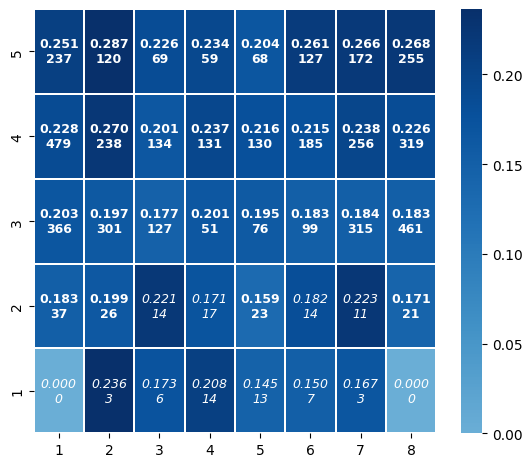

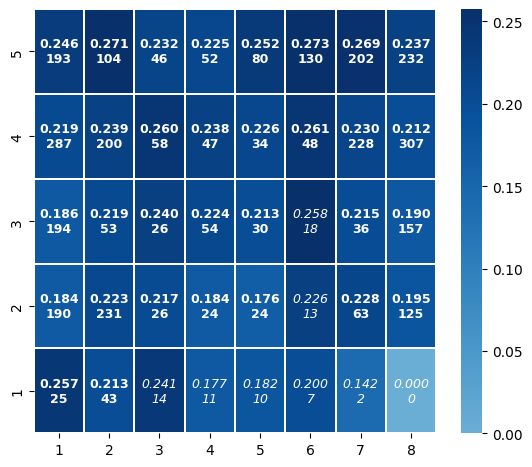

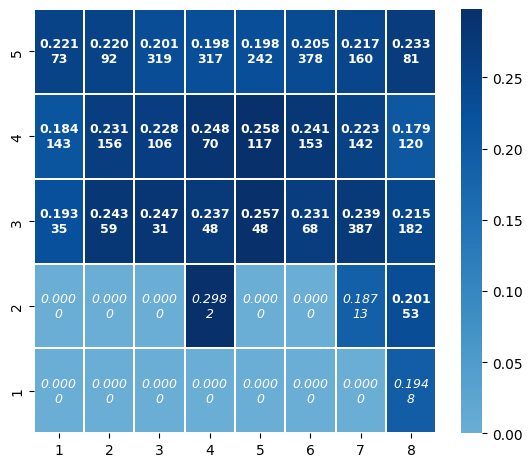

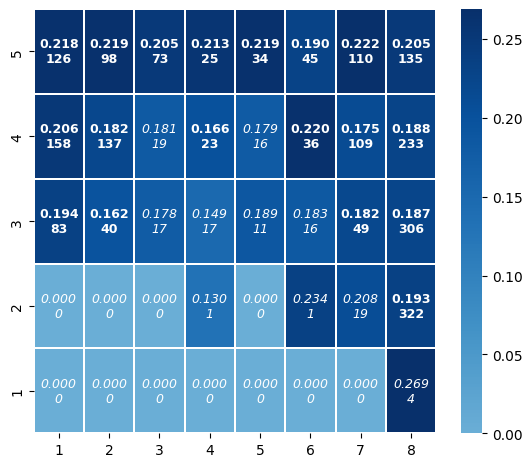

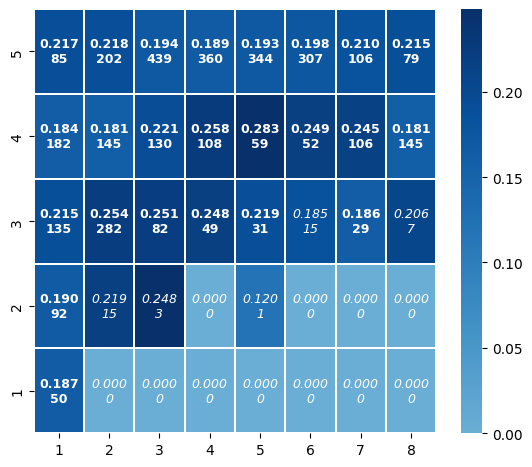

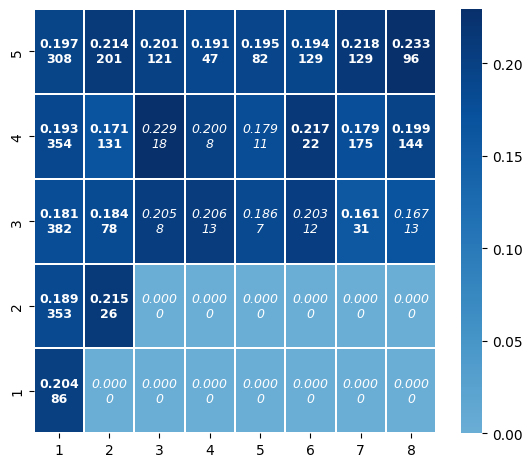

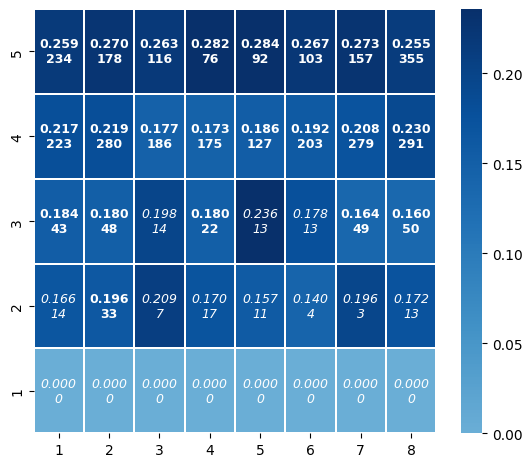

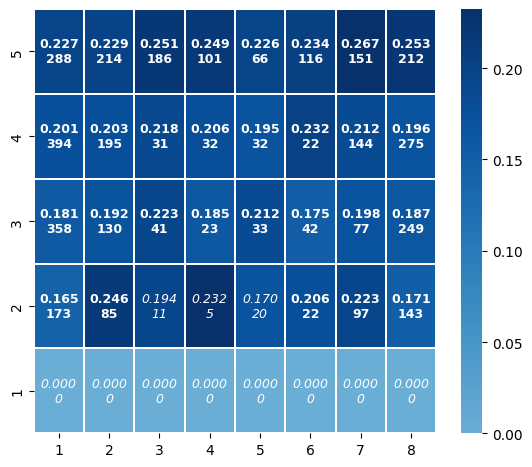

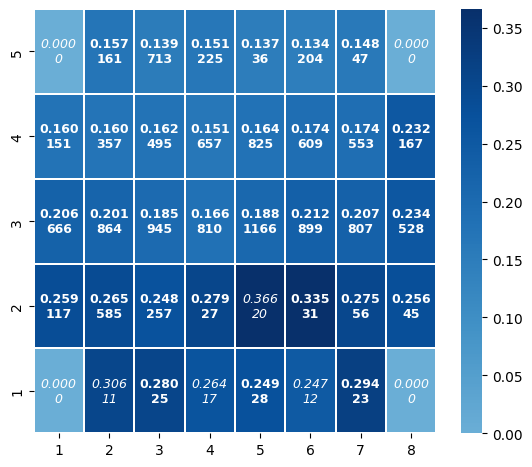

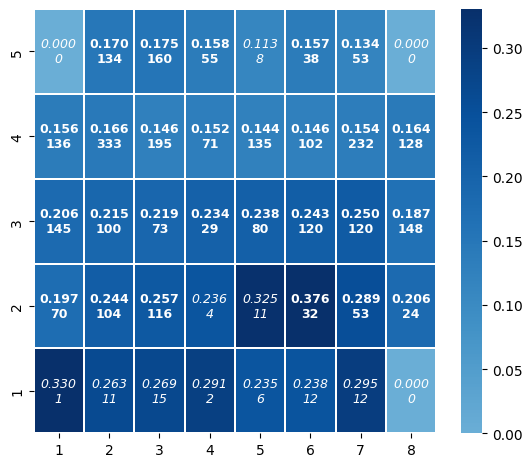

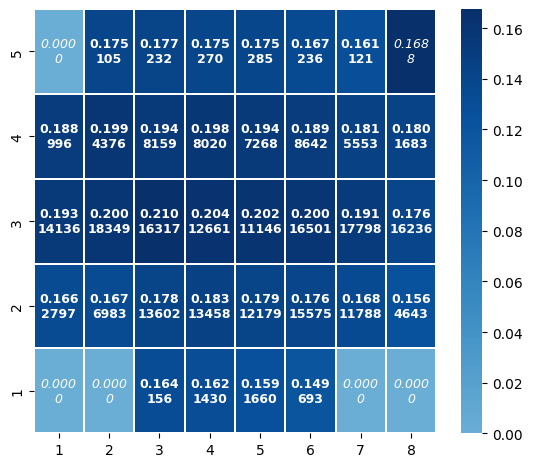

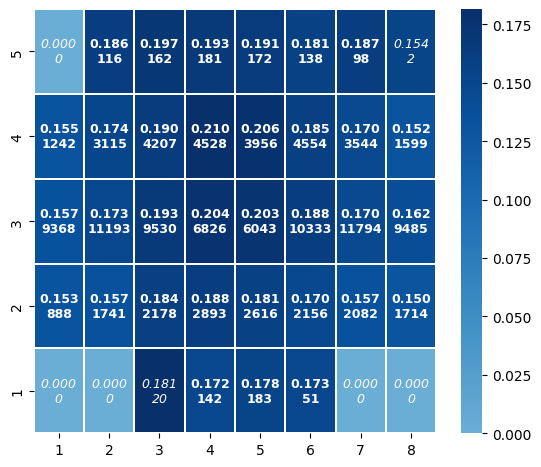

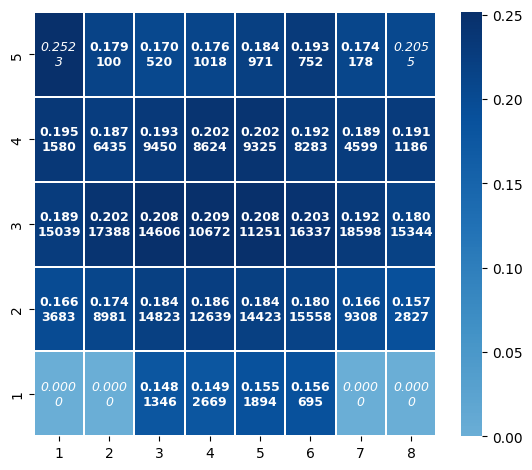

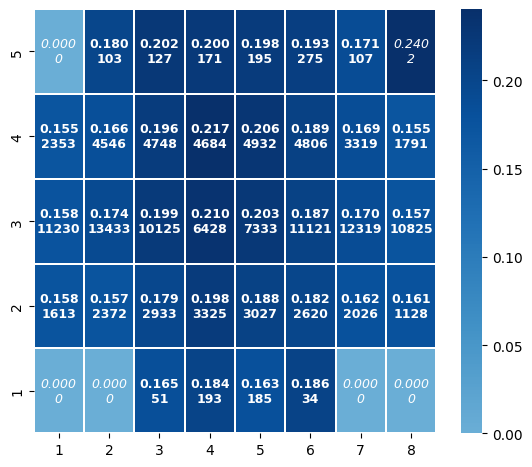

In [ ]:
import os
for subdir, dirs, files in os.walk(rootdir):
  if 'exp_' in subdir:
    hppg_fn = 'horizontal_points_per_grid'
    vppg_fn = 'vertical_points_per_grid'
    meanHmtf50_fn = 'surface_plot_horizontal_MTF50_mean'
    meanVmtf50_fn = 'surface_plot_vertical_MTF50_mean'
    try:
      hppg=pd.read_csv("".join([subdir,'/',hppg_fn,'.csv']), header=None)
      vppg=pd.read_csv("".join([subdir,'/',vppg_fn,'.csv']), header=None)
      meanHmtf50=pd.read_csv("".join([subdir,'/',meanHmtf50_fn,'.csv']), header=None)
      meanVmtf50=pd.read_csv("".join([subdir,'/',meanVmtf50_fn,'.csv']), header=None)
      heatmap_MTF50(hppg, meanHmtf50, meanHmtf50_fn, subdir)
      heatmap_MTF50(vppg, meanVmtf50, meanVmtf50_fn, subdir)
    except:
      print("Could not generate Heatmaps in directory!")